In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Display the first few rows of each DataFrame
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  Tran

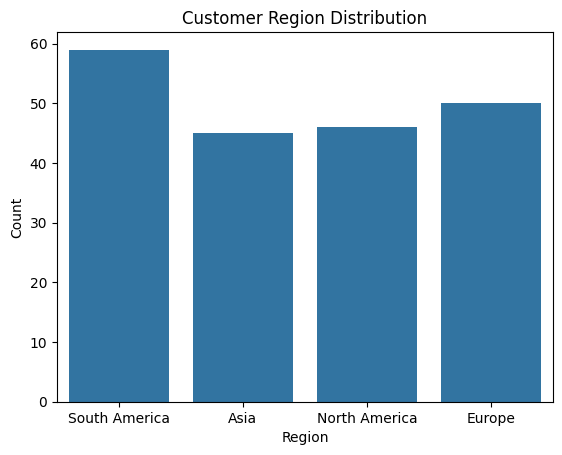

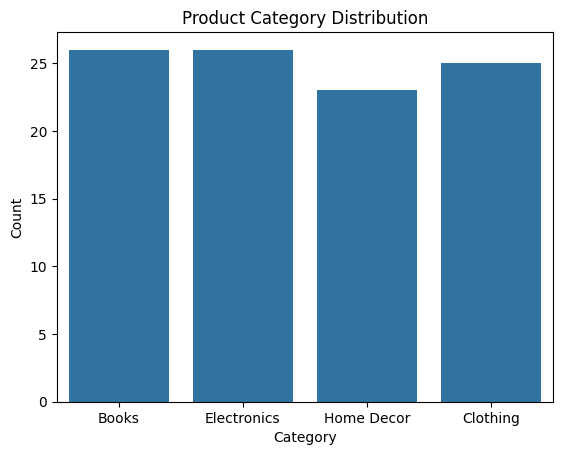

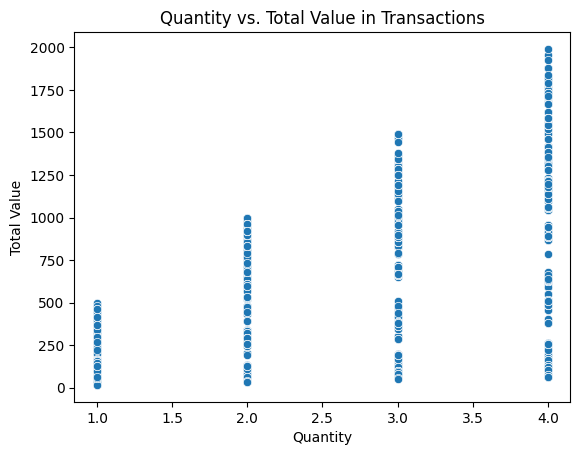

In [ ]:
# Display columns
print(customers.columns)
print(products.columns)
print(transactions.columns)

# Check the first few rows
print(customers.head())
print(products.head())
print(transactions.head())

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Example Visualizations with Available Columns
# Assuming the 'Region' column exists
sns.countplot(x='Region', data=customers)
plt.title('Customer Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Assuming the 'Category' column exists
sns.countplot(x='Category', data=products)
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Assuming the 'Quantity' and 'TotalValue' columns exist
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Quantity vs. Total Value in Transactions')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming customer_profiles is a matrix where each row represents a customer's profile features
# Example: customer_profiles = customers[['Age', 'Region', ...]].values

# For demonstration, let's create a sample customer_profiles array
customer_profiles = np.array([
    [25, 1, 100],  # Customer 1
    [35, 2, 200],  # Customer 2
    [45, 3, 300]   # Customer 3
])

# Calculate similarity matrix
similarity_matrix = cosine_similarity(customer_profiles)

# Function to find top N similar customers
def find_top_similar(customers, customer_id, top_n=3):
    similarity_scores = similarity_matrix[customer_id]
    similar_indices = similarity_scores.argsort()[-top_n:][::-1]
    return [(i, similarity_scores[i]) for i in similar_indices if i != customer_id]

# Find top 3 similar customers for customer with ID 0
top_similar_customers = find_top_similar(customer_profiles, 0)
print(top_similar_customers)

[(1, 0.9974285263133856), (2, 0.9953874552803443)]


In [ ]:
import csv

# Example customer IDs
customer_ids = ['C0001', 'C0002', 'C0003']

# Create Lookalike.csv
with open('/content/Lookalike.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['CustomerID', 'LookalikeID', 'SimilarityScore'])
    for customer_id in customer_ids:
        top_similars = find_top_similar(customer_profiles, int(customer_id[1:]) - 1)
        for similar_id, score in top_similars:
            writer.writerow([customer_id, f'C{similar_id+1:04d}', score])

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

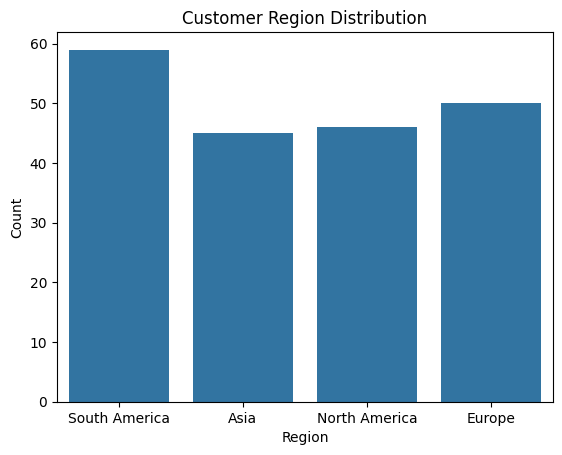

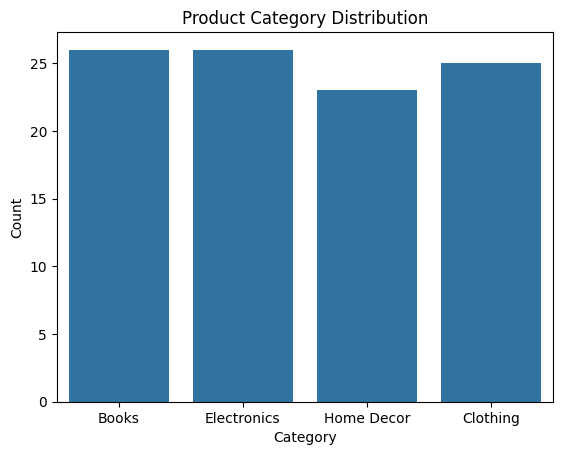

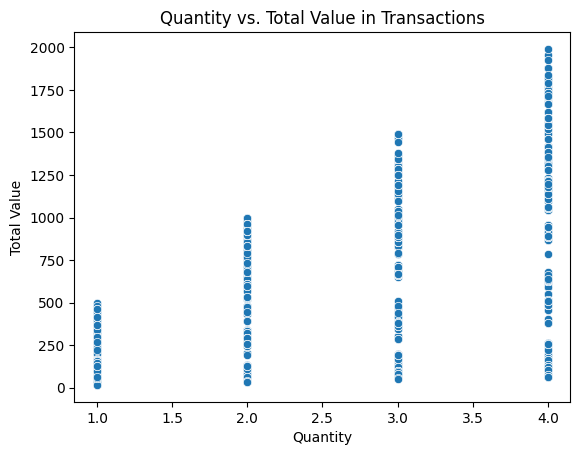

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

# Display the first few rows and columns
print(customers.head())
print(products.head())
print(transactions.head())

print(customers.columns)
print(products.columns)
print(transactions.columns)

# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Descriptive statistics
print(customers.describe())
print(products.describe())
print(transactions.describe())

# Customer Region Distribution
sns.countplot(x='Region', data=customers)
plt.title('Customer Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

# Product Category Distribution
sns.countplot(x='Category', data=products)
plt.title('Product Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Scatterplot of Quantity vs. TotalValue in Transactions
sns.scatterplot(x='Quantity', y='TotalValue', data=transactions)
plt.title('Quantity vs. Total Value in Transactions')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
# Display the first few rows and columns of each DataFrame to verify their content
print(customers.head())
print(transactions.head())

   Age Region
0   25  North
1   30  South
2   22   East
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [ ]:
print(customers.columns)
print(transactions.columns)

Index(['Age', 'Region'], dtype='object')
Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
